# Plot whole rock geochemistry data

Whole rock geochemistry data were developed from the studied OR24-2 sample of a tuff clast within the upper Orinda Fm that was dated in the Gerasimov et al. study. Data were developed from the basal basalt lava flow of the Orinda volcanics as sample OR24-4. These data were developed using a Malvern PANalytical, Inc. Zetium X-ray fluorescence (XRF) vacuum spectrometer at Franklin and Marshall College by Dr. Stan Mertzman.

In addition, we include data developed by George Brimhall that have been included in EPS 101 Field Geology and Digital Mapping lecture slides that have been extracted through plot digitization. These data are communicated as being Brimhall personal communication for the Moraga Tuff.

## Import scientific Python modules

The tasplot module needs to be installed using this command prior to executing the code below:

```pip install git+https://bitbucket.org/jsteven5/tasplot.git```

In [1]:
pip install git+https://bitbucket.org/jsteven5/tasplot.git

  Cloning https://bitbucket.org/jsteven5/tasplot.git to /private/var/folders/yz/k237ph5966sct06x3qf_9dt40000gn/T/pip-req-build-egwqfzrp
  Running command git clone -q https://bitbucket.org/jsteven5/tasplot.git /private/var/folders/yz/k237ph5966sct06x3qf_9dt40000gn/T/pip-req-build-egwqfzrp
  Resolved https://bitbucket.org/jsteven5/tasplot.git to commit dcd1d9e1f57d8b8554e6d76f6ab83ccc299903e2
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tasplot
%config InlineBackend.figure_format='retina'
%matplotlib inline

## Import, transpose, and plot data

In [2]:
XRF_data = pd.read_csv('../data/geochemistry/BM_IR_XRF_data.csv')
XRF_data

,Specimen,BM22-1,BM22-2,BM22-3,IR22-1,IR22-2
0,SiO2,76.93,76.78,76.16,78.38,77.36
1,TiO2,0.13,0.12,0.12,0.11,0.12
2,Al2O3,13.61,13.49,14.31,12.71,12.93
3,Fe2O3T,0.56,0.60,0.39,0.35,0.37
4,MnO,0.00,0.00,0.00,0.00,0.00
5,MgO,0.19,0.27,0.25,0.09,0.07
6,CaO,0.39,0.52,0.50,0.33,0.38
7,Na2O,3.43,3.73,3.37,3.68,4.11
8,K2O,4.24,4.42,4.77,3.85,4.34
9,P2O5,0.02,0.01,0.02,0.07,0.04


## Data cleaning

Convert values below detection limit to be 0 so that all values are floats rather than strings

In [3]:
# Create a function that converts the strings to floats
def convert_to_float(value):
    # Check if the value is a string and starts with '<'
    if isinstance(value, str) and value.startswith('<'):
        # Convert everything after the '<' to a float
        # Example: for '<2' it returns 1.0
        return 0
    else:
        # If it's not a string with '<', just return the float value of the value
        return float(value)

# Apply the function to the entire DataFrame
# If the DataFrame has multiple columns, you'd iterate over each one
for column in ['BM22-1', 'BM22-2', 'BM22-3', 'IR22-1', 'IR22-2']:
    XRF_data[column] = XRF_data[column].apply(convert_to_float)

In [4]:
XRF_data

,Specimen,BM22-1,BM22-2,BM22-3,IR22-1,IR22-2
0,SiO2,76.93,76.78,76.16,78.38,77.36
1,TiO2,0.13,0.12,0.12,0.11,0.12
2,Al2O3,13.61,13.49,14.31,12.71,12.93
3,Fe2O3T,0.56,0.60,0.39,0.35,0.37
4,MnO,0.00,0.00,0.00,0.00,0.00
5,MgO,0.19,0.27,0.25,0.09,0.07
6,CaO,0.39,0.52,0.50,0.33,0.38
7,Na2O,3.43,3.73,3.37,3.68,4.11
8,K2O,4.24,4.42,4.77,3.85,4.34
9,P2O5,0.02,0.01,0.02,0.07,0.04


In [5]:
XRF_data = XRF_data.set_index('Specimen').T
XRF_data['total_alkali'] = XRF_data['Na2O'] + XRF_data['K2O']
XRF_data

Specimen,SiO2,TiO2,Al2O3,Fe2O3T,MnO,MgO,CaO,Na2O,K2O,P2O5,...,Cu,Zn,Co,Ba,La,Ce,U,Th,Sc,Pb
BM22-1,76.93,0.13,13.61,0.56,0.0,0.19,0.39,3.43,4.24,0.02,...,4.0,36.0,0.0,479.0,34.0,60.0,6.5,18.6,4.0,23.0
BM22-2,76.78,0.12,13.49,0.60,0.0,0.27,0.52,3.73,4.42,0.01,...,2.0,30.0,0.0,558.0,35.0,53.0,5.8,18.3,3.0,23.0
BM22-3,76.16,0.12,14.31,0.39,0.0,0.25,0.50,3.37,4.77,0.02,...,0.0,23.0,0.0,480.0,27.0,61.0,5.9,17.9,0.0,21.0
IR22-1,78.38,0.11,12.71,0.35,0.0,0.09,0.33,3.68,3.85,0.07,...,0.0,22.0,0.0,720.0,35.0,77.0,5.6,15.4,3.0,21.0
IR22-2,77.36,0.12,12.93,0.37,0.0,0.07,0.38,4.11,4.34,0.04,...,5.0,23.0,0.0,788.0,27.0,46.0,6.8,12.8,3.0,24.0


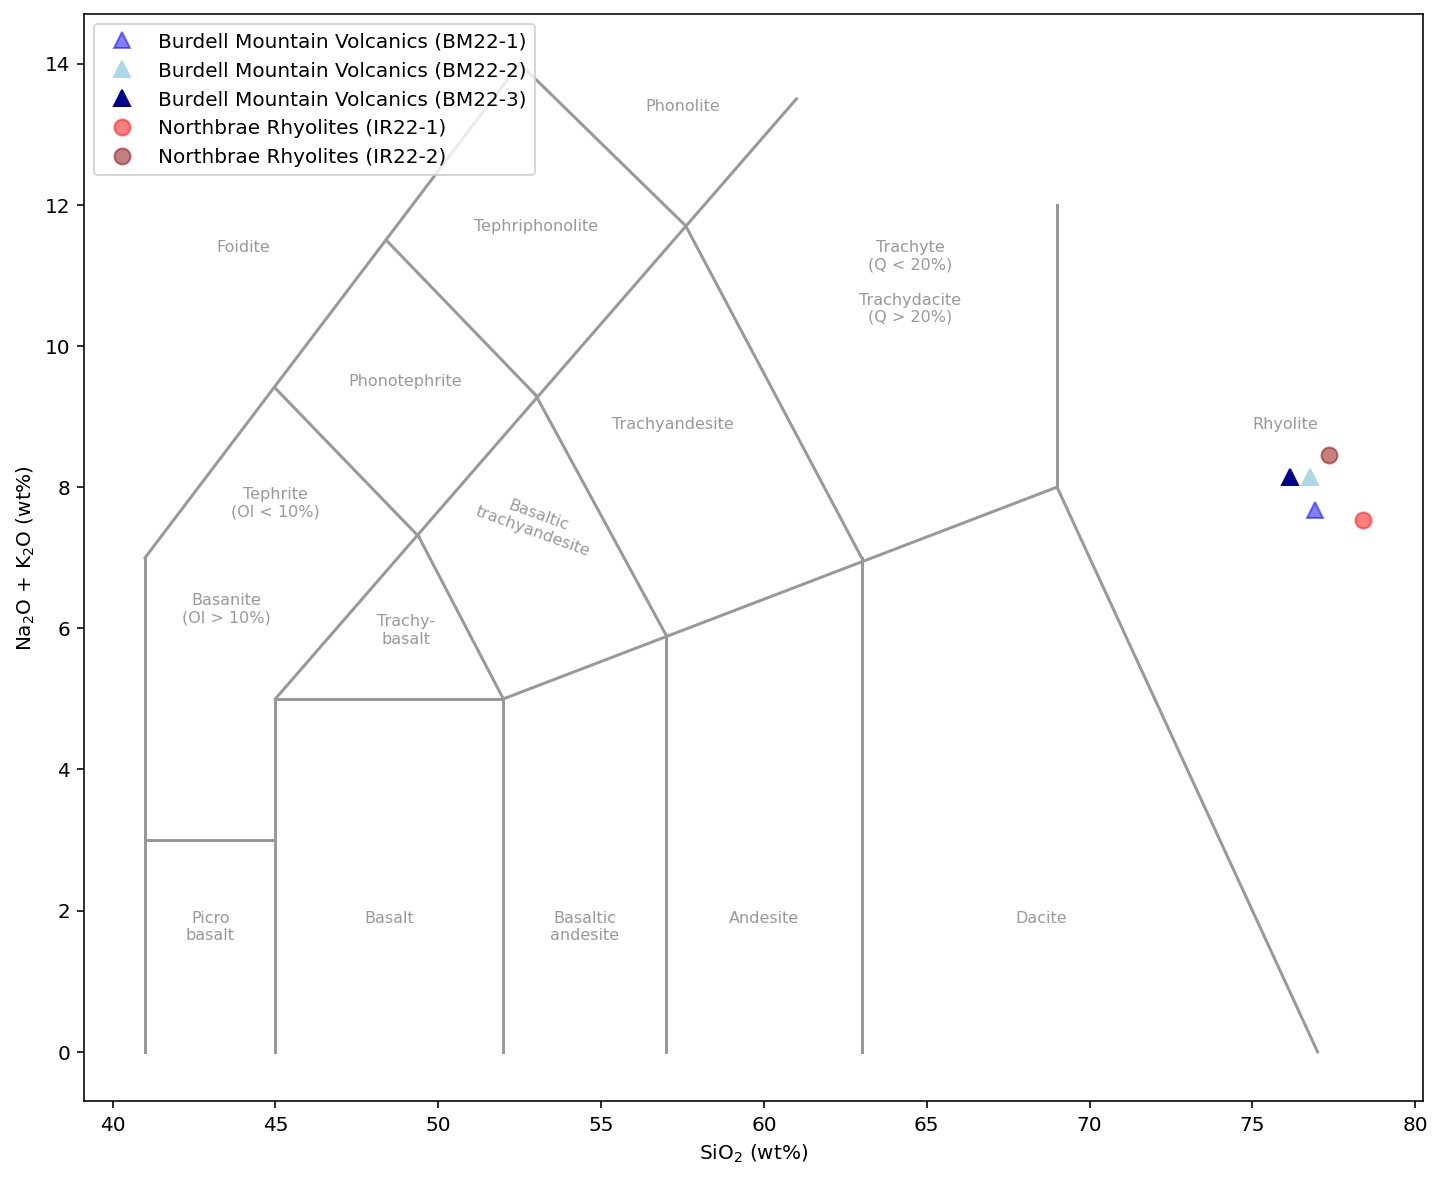

In [10]:
# Set up figure
fig = plt.figure(figsize=(12,10))  # create figure
ax1 = plt.subplot(111)  # create axes and store as variable
tasplot.add_LeMaitre_fields(ax1)  # add TAS fields to plot
 
ax1.plot(XRF_data.loc['BM22-1']['SiO2'], XRF_data.loc['BM22-1']['total_alkali'], '^', alpha=0.5,
         label='Burdell Mountain Volcanics (BM22-1)',markersize=8, 
         color='blue')
ax1.plot(XRF_data.loc['BM22-2']['SiO2'], XRF_data.loc['BM22-2']['total_alkali'], '^', alpha=1,
         label='Burdell Mountain Volcanics (BM22-2)',markersize=8,
         color='lightblue')
ax1.plot(XRF_data.loc['BM22-3']['SiO2'], XRF_data.loc['BM22-3']['total_alkali'], '^', alpha=1,
         label='Burdell Mountain Volcanics (BM22-3)',markersize=8,
         color='darkblue')
ax1.plot(XRF_data.loc['IR22-1']['SiO2'], XRF_data.loc['IR22-1']['total_alkali'], 'o', alpha=0.5,
         label='Northbrae Rhyolites (IR22-1)',markersize=8, 
         color='red')
ax1.plot(XRF_data.loc['IR22-2']['SiO2'], XRF_data.loc['IR22-2']['total_alkali'], 'o', alpha=0.5,
         label='Northbrae Rhyolites (IR22-2)',markersize=8, 
         color='darkred')
 
# Decorate the plot
plt.xlabel(r'SiO$_2$ (wt%)')  # Use LaTeX notation for subscript
plt.ylabel(r'Na$_2$O + K$_2$O (wt%)')
plt.legend(loc='upper left', numpoints=1)
plt.show()

In [11]:
XRF_data_coast_range = pd.read_csv('../data/geochemistry/compiled_coast_range_volcanic_geochemistry.csv')
#XRF_data_coast_range = XRF_data_coast_range[]
XRF_data_coast_range

,Sample,GHC-856,GHC-857,GHC-858,GHC-859,88CS-GP1,GHC-843,GHC-844,1094-3,1094-5,...,PK224,9EWPP-10,91SGPP-54A,97EWPP-16A,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115
0,Reference,"Youngman, 1986","Youngman, 1986","Youngman, 1986","Youngman, 1986","Youngman, 1986","Youngman, 1986","Youngman, 1986","Youngman, 1986","Youngman, 1986",...,"Kosovichev, 2006","Kosovichev, 2006","Kosovichev, 2006","Kosovichev, 2006",NaN,NaN,NaN,NaN,NaN,NaN
1,Unit,Southern Sonoma Volcanic Field and Berkeley Hills,Southern Sonoma Volcanic Field and Berkeley Hills,Southern Sonoma Volcanic Field and Berkeley Hills,Southern Sonoma Volcanic Field and Berkeley Hills,Southern Sonoma Volcanic Field and Berkeley Hills,Southern Sonoma Volcanic Field and Berkeley Hills,Southern Sonoma Volcanic Field and Berkeley Hills,Southern Sonoma Volcanic Field and Berkeley Hills,Southern Sonoma Volcanic Field and Berkeley Hills,...,Orestimba Creek,Dowdy Ranch,Dowdy Ranch,Dowdy Ranch,NaN,NaN,NaN,NaN,NaN,NaN
2,Rock Type,basalt,basalt,basalt,basalt,basalt,basaltic-andesite,basalt,basaltic-andesite,basaltic-andesite,...,Basaltic-andesite,Andesite,Andesite,Andesite,NaN,NaN,NaN,NaN,NaN,NaN
3,Element (ppm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Va,143.7,170.7,162.3,67.2,226.6,182.6,203.9,119,165.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,MnO±,0.01,0.01,0.02,0.02,0.01,0.01,0.02,0.01,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,FeO,6.09,7.49,7.84,7.56,7.69,6.44,8.26,6.15,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,FeO±,0.33,0.4,0.42,0.14,0.42,0.35,0.45,0.33,0.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,Fe2O3(T),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
XRF_data_coast_range = XRF_data_coast_range.set_index('Sample').T
XRF_data_coast_range

Sample,Reference,Unit,Rock Type,Element (ppm),Va,Va±,Cr,Cr±,Ni,Ni±,...,CaO,CaO±,TiO2,TiO2±,MnO,MnO±,FeO,FeO±,Fe2O3(T),LOI
GHC-856,"Youngman, 1986",Southern Sonoma Volcanic Field and Berkeley Hills,basalt,NaN,143.7,17,142.8,9.1,51.7,4.4,...,7.4,0.24,1.05,0.1,0.1,0.01,6.09,0.33,NaN,NaN
GHC-857,"Youngman, 1986",Southern Sonoma Volcanic Field and Berkeley Hills,basalt,NaN,170.7,19.9,146.2,10.1,44.5,4.7,...,10.36,0.34,1.27,0.12,0.1,0.01,7.49,0.4,NaN,NaN
GHC-858,"Youngman, 1986",Southern Sonoma Volcanic Field and Berkeley Hills,basalt,NaN,162.3,20.8,90.5,9.9,24.7,4.1,...,8.93,0.29,1.37,0.12,0.13,0.02,7.84,0.42,NaN,NaN
GHC-859,"Youngman, 1986",Southern Sonoma Volcanic Field and Berkeley Hills,basalt,NaN,67.2,17.5,0,0,3.3,3.4,...,3.88,0.14,0.98,0.09,0.14,0.02,7.56,0.14,NaN,NaN
88CS-GP1,"Youngman, 1986",Southern Sonoma Volcanic Field and Berkeley Hills,basalt,NaN,226.6,21.6,151.8,10.6,64.6,4.8,...,9.87,0.33,1.44,0.13,0.11,0.01,7.69,0.42,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unnamed: 111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
XRF_data_coast_range.columns

Index(['Reference', 'Unit', 'Rock Type', 'Element (ppm)', 'Va', 'Va±', 'Cr',
       'Cr±', 'Ni', 'Ni±', 'Cu', 'Cu±', 'Zn', 'Zn±', 'Ga', 'Ga±', 'As', 'As±',
       'Pb', 'Pb±', 'Th', 'Th±', 'Rb', 'Rb±', 'Sr', 'Sr±', 'Y', 'Y±', 'Zr',
       'Zr±', 'Nb', 'Nb±', 'Cs', 'Cs±', 'Ba', 'Ba±', 'La', 'La±', 'Ce', 'Ce±',
       'Pr', 'Pr±', 'Nd', 'Nd±', 'Sm', 'Sm±', 'Co', 'Dy', 'Er', 'Eu', 'Gd',
       'Hf', 'Ho', 'Li', 'Lu', 'Sb', 'Sc', 'Sn', 'Ta', 'Tb', 'Tl', 'Tm', 'U',
       'V', 'W', 'Yb', 'Total Wt %', 'Na2O', 'Na2O±', 'MgO', 'MgO±', 'Al2O',
       'Al2O±', 'Al2O3', 'SiO2', 'SiO2±', 'P2O5', 'P2O5±', 'K2O', 'K2O±',
       'CaO', 'CaO±', 'TiO2', 'TiO2±', 'MnO', 'MnO±', 'FeO', 'FeO±',
       'Fe2O3(T)', 'LOI'],
      dtype='object', name='Sample')

In [18]:
XRF_data_coast_range = XRF_data_coast_range[['Unit','SiO2','Na2O','K2O']]
XRF_data_coast_range = XRF_data_coast_range.dropna()

for column in ['SiO2', 'Na2O', 'K2O']:
    XRF_data_coast_range[column] = XRF_data_coast_range[column].apply(convert_to_float)

XRF_data_coast_range['total_alkali'] = XRF_data_coast_range['Na2O']+XRF_data_coast_range['K2O']
XRF_data_coast_range.head()

Sample,Unit,SiO2,Na2O,K2O,total_alkali
GHC-856,Southern Sonoma Volcanic Field and Berkeley Hills,60.68,3.76,1.82,5.58
GHC-857,Southern Sonoma Volcanic Field and Berkeley Hills,53.34,3.45,0.54,3.99
GHC-858,Southern Sonoma Volcanic Field and Berkeley Hills,54.64,3.44,0.87,4.31
GHC-859,Southern Sonoma Volcanic Field and Berkeley Hills,62.09,5.35,2.10,7.45
88CS-GP1,Southern Sonoma Volcanic Field and Berkeley Hills,50.30,3.63,0.72,4.35


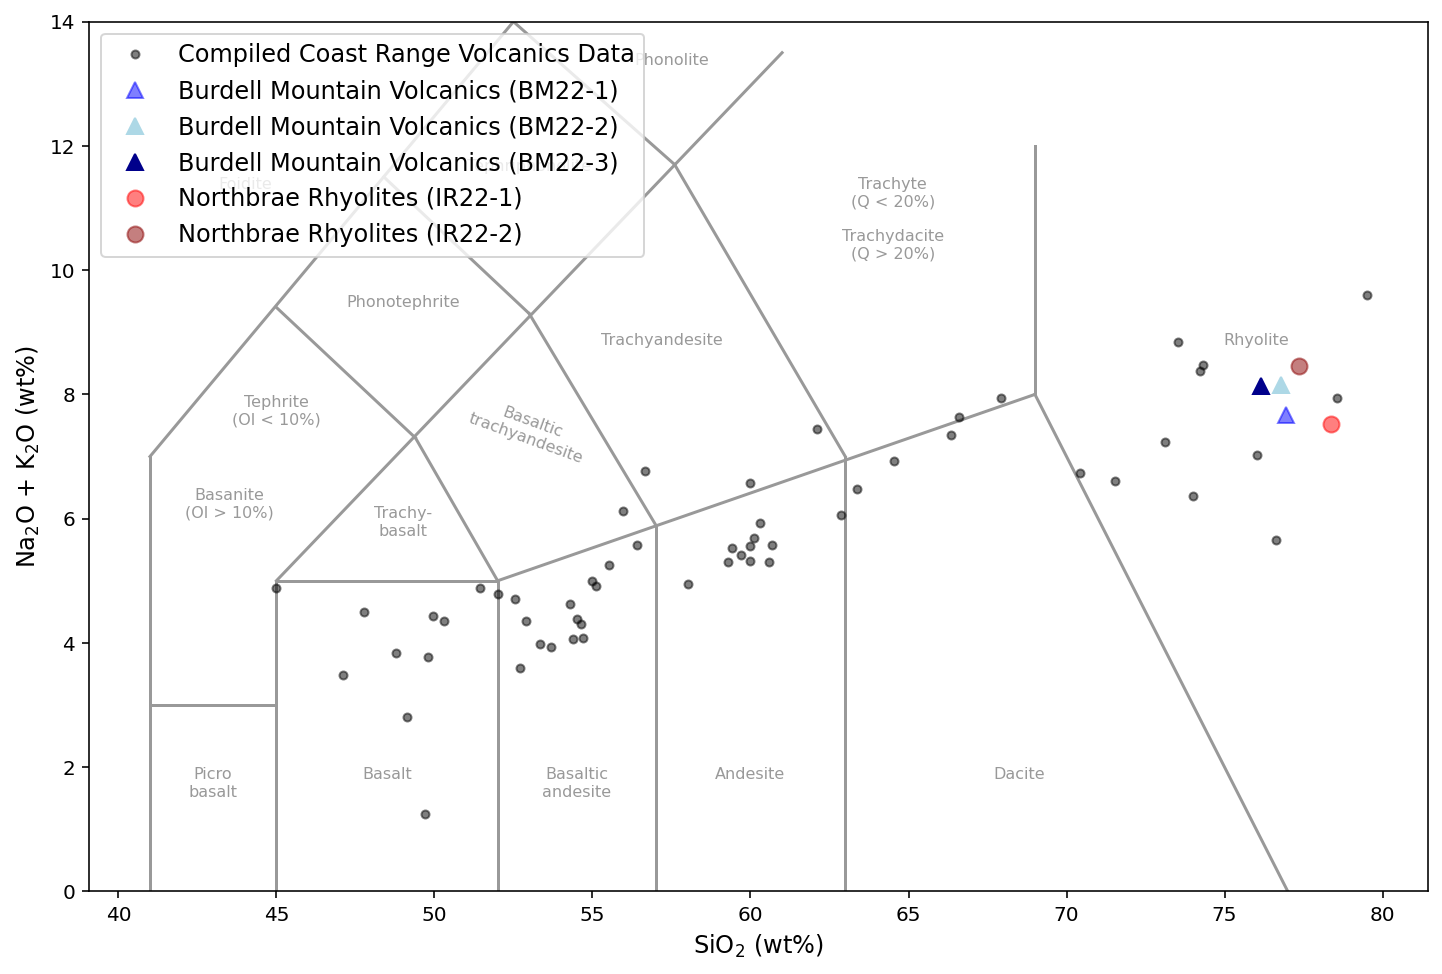

In [27]:
# Set up figure
fig = plt.figure(figsize=(12,8))  # create figure
ax1 = plt.subplot(111)  # create axes and store as variable
tasplot.add_LeMaitre_fields(ax1)  # add TAS fields to plot
 
# Note that you can change the default colour and font size e.g.
# >>> tasplot.add_LeMaitre_Fields(ax1, color='red', fontsize=8)

ax1.plot(XRF_data_coast_range['SiO2'], XRF_data_coast_range['total_alkali'], '.', alpha=0.5 ,
         markersize=8, label='Compiled Coast Range Volcanics Data', color='black')
 
ax1.plot(XRF_data.loc['BM22-1']['SiO2'], XRF_data.loc['BM22-1']['total_alkali'], '^', alpha=0.5,
         label='Burdell Mountain Volcanics (BM22-1)',markersize=8, 
         color='blue')
ax1.plot(XRF_data.loc['BM22-2']['SiO2'], XRF_data.loc['BM22-2']['total_alkali'], '^', alpha=1,
         label='Burdell Mountain Volcanics (BM22-2)',markersize=8,
         color='lightblue')
ax1.plot(XRF_data.loc['BM22-3']['SiO2'], XRF_data.loc['BM22-3']['total_alkali'], '^', alpha=1,
         label='Burdell Mountain Volcanics (BM22-3)',markersize=8,
         color='darkblue')
ax1.plot(XRF_data.loc['IR22-1']['SiO2'], XRF_data.loc['IR22-1']['total_alkali'], 'o', alpha=0.5,
         label='Northbrae Rhyolites (IR22-1)',markersize=8, 
         color='red')
ax1.plot(XRF_data.loc['IR22-2']['SiO2'], XRF_data.loc['IR22-2']['total_alkali'], 'o', alpha=0.5,
         label='Northbrae Rhyolites (IR22-2)',markersize=8, 
         color='darkred')    

plt.ylim(0, 14)

# Decorate the plot
plt.xlabel(r'SiO$_2$ (wt%)', fontsize=12)  # Use LaTeX notation for subscript
plt.ylabel(r'Na$_2$O + K$_2$O (wt%)', fontsize=12)
plt.legend(loc='upper left', numpoints=1, fontsize=12)
plt.savefig('./output/TAS_plot.pdf', bbox_inches='tight')
plt.show()